# Part 1 - Loading Data
---
### Papers Past Topic Modeling
<br/>

Ben Faulks - bmf43@uclive.ac.nz

Xiandong Cai - xca24@uclive.ac.nz

Yujie Cui - ycu23@uclive.ac.nz

In [1]:
import glob, os, sys, gc, subprocess
sys.path.insert(0, '../utils') # for import customed modules
from utils import conf_pyspark, print_filesize, load_dataset
import pandas as pd
pd.set_option('display.max_columns', 120)
pd.set_option('display.max_colwidth', 120)

# for plot
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

## 1 The Papers Past Dataset

In [2]:
# set path of raw data
path = r'../data/papers_past'

**Check total dataset directory size:**

In [3]:
print('Total size:', subprocess.check_output(['du','-sh', path]).split()[0].decode('utf-8'))

Total size: 33G


**Check dataset files path and size:**

In [4]:
files = glob.glob(path + '/*.txt')
files.sort()
print_filesize(files)

1 ../data/papers_past/Akaroa Mail and Banks Peninsula Advertiser.txt 198.2 MB
2 ../data/papers_past/Albertland Gazette.txt 266.6 KB
3 ../data/papers_past/Ashburton Guardian.txt 882.2 MB
4 ../data/papers_past/Auckland Star.txt 1.2 GB
5 ../data/papers_past/Bay Of Plenty Times.txt 403.4 MB
6 ../data/papers_past/Bruce Herald.txt 300.1 MB
7 ../data/papers_past/Bush Advocate.txt 178.4 MB
8 ../data/papers_past/Clutha Leader.txt 245.5 MB
9 ../data/papers_past/Colonist.txt 970.4 MB
10 ../data/papers_past/Daily Southern Cross.txt 796.9 MB
11 ../data/papers_past/Daily Telegraph.txt 456.1 MB
12 ../data/papers_past/Ellesmere Guardian.txt 342.0 MB
13 ../data/papers_past/Evening Post.txt 5.9 GB
14 ../data/papers_past/Fair Play.txt 3.0 MB
15 ../data/papers_past/Feilding Star.txt 823.5 MB
16 ../data/papers_past/Grey River Argus.txt 946.6 MB
17 ../data/papers_past/Hawera & Normanby Star.txt 1.3 GB
18 ../data/papers_past/Hawke's Bay Herald.txt 424.6 MB
19 ../data/papers_past/Hawke's Bay Weekly Times.txt 

**Check total samples/rows/documents of the dataset:**

In [5]:
# list of each file line number
lines = [sum(1 for line in open(f)) for f in files] 

print('Total sample number:', sum(lines))

Total sample number: 16731578


**Visualize the dataset based on the file/publisher:**

In [6]:
# list of each file name
names = [os.path.splitext(os.path.basename(f))[0] for f in files] 
# dictionary of each file path and line number
info = dict(zip(names, lines)) 

# transform dict of dataset files to dataframe for statistic and ploting.
df_info = pd.DataFrame.from_dict(info, orient='index').reset_index()
df_info.columns = ['publisher', 'lines']
df_info = df_info.sort_values('lines', ascending=False).reset_index(drop=True)
df_info.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67
publisher,Evening Post,Hawera & Normanby Star,Wanganui Chronicle,Otago Daily Times,Marlborough Express,Auckland Star,Poverty Bay Herald,Colonist,Ashburton Guardian,Grey River Argus,Thames Star,Feilding Star,Star,Wanganui Herald,Wairarapa Daily Times,Nelson Evening Mail,Otago Witness,Taranaki Herald,West Coast Times,Northern Advocate,North Otago Times,Bay Of Plenty Times,Daily Telegraph,Hawke's Bay Herald,Daily Southern Cross,Southland Times,Timaru Herald,Ellesmere Guardian,NZ Truth,Ohinemuri Gazette,Bruce Herald,Tuapeka Times,Observer,Bush Advocate,Mataura Ensign,Akaroa Mail and Banks Peninsula Advertiser,Clutha Leader,New Zealand Tablet,Manawatu Standard,Wellington Independent,"Rodney and Otamatea Times, Waitemata and Kaipara Gazette",Inangahua Times,Waikato Times,Manawatu Herald,Taranaki Daily News,Nelson Examiner and New Zealand Chronicle,Manawatu Times,Otautau Standard and Wallace County Chronicle,Lyttelton_Times,Te Aroha News,Hutt News,Kaipara and Waitemata Echo,New Zealand Spectator and Cook's Strait Guardian,New Zealand Free Lance,Waiapu Church Gazette,Oxford Observer,New Zealander,New Zealand Gazette and Wellington Spectator,Waimate Daily Advertiser,New Zealand Illustrated Magazine,Progress,Hawke's Bay Weekly Times,New Zealand Colonist and Port Nicholson Advertiser,Kai Tiaki,Fair Play,Waiapu Church Times,New Zealand Advertiser and Bay of Islands Gazette,Albertland Gazette
lines,3007465,807068,804226,747706,711069,674134,643505,638055,603346,574017,562647,467377,431855,420421,375253,343312,329016,328784,314293,290601,283063,246233,217769,216671,215102,211876,205144,182751,135108,133499,120432,116973,116157,101273,98941,96608,88108,79804,79269,76112,75831,70689,61250,59989,59712,51238,43499,40199,28911,26683,16138,15809,14283,14232,13733,9908,9886,5400,5037,4201,3216,1690,1650,1630,1180,245,184,112


Text(0.5, 0, 'File/Publisher')

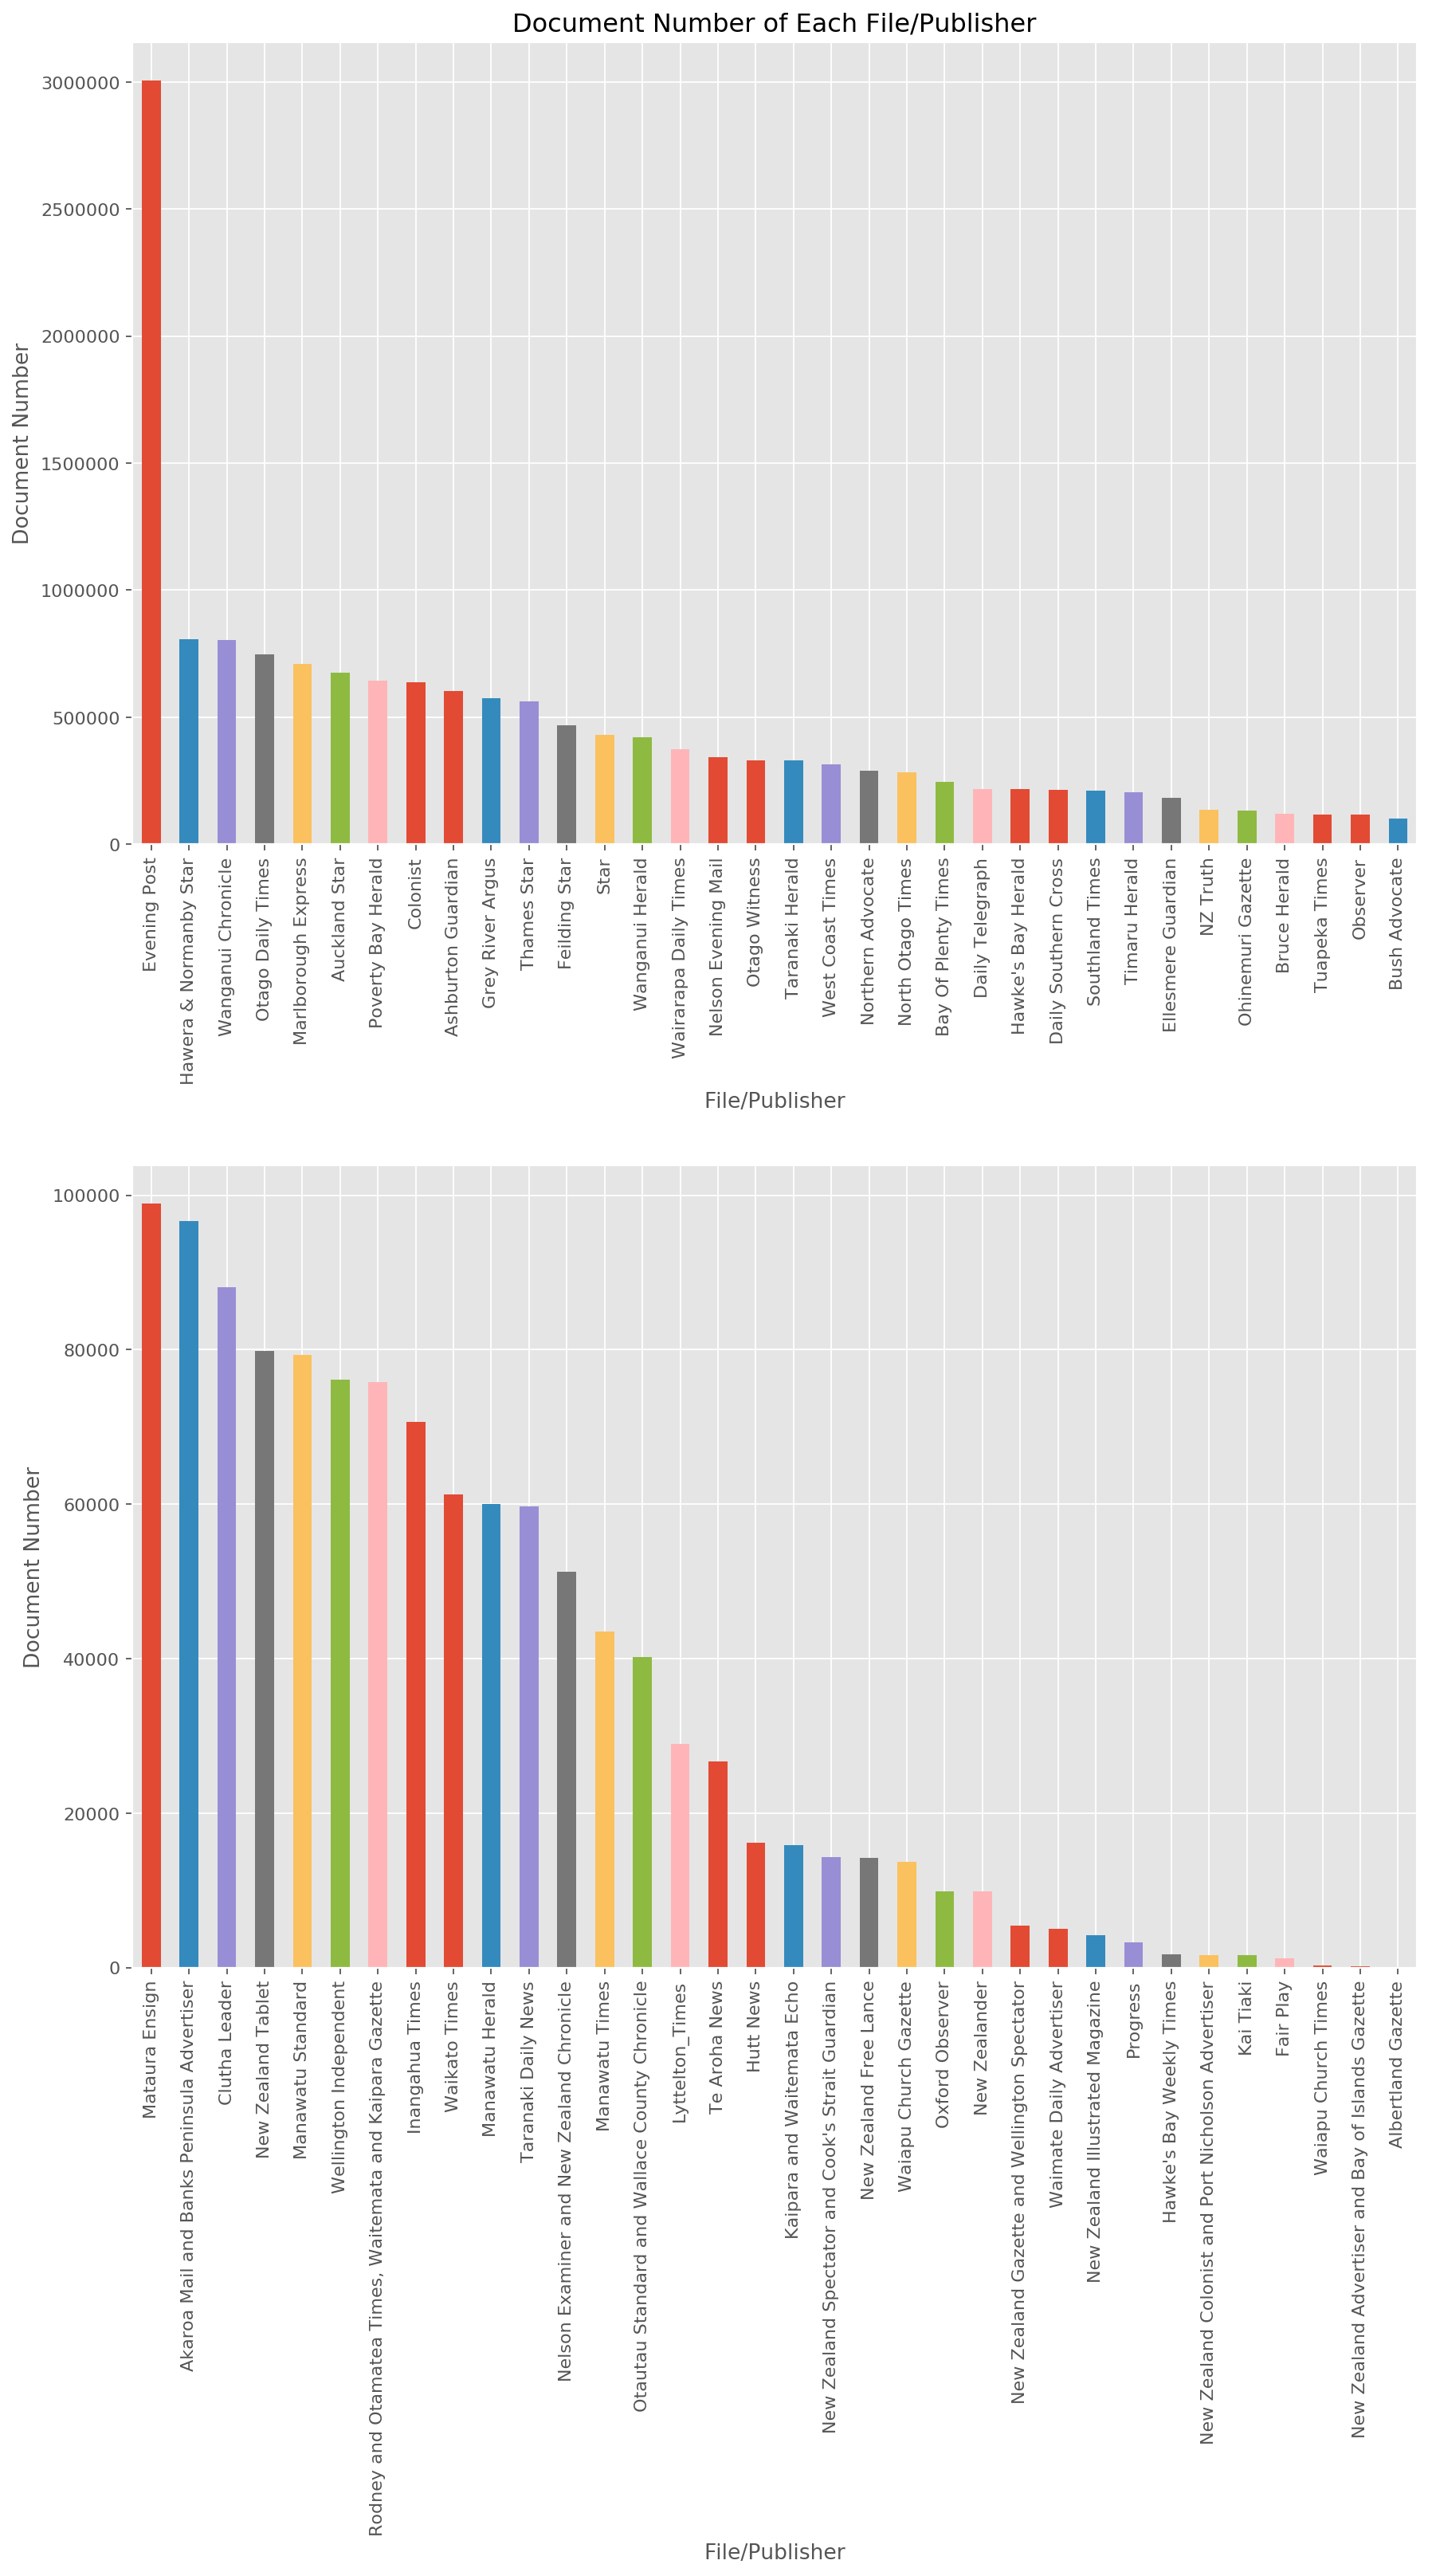

In [7]:
# index of half dataframe, split dataframe to plot better
i = int(df_info.shape[0]/2)

# plot
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(13, 20), dpi=160)
fig.subplots_adjust(hspace=0.4)
df_info.iloc[:i].plot(ax=axes[0], 
                      kind='bar', 
                      x='publisher', 
                      y='lines', 
                      legend=False)
df_info.iloc[i:].plot(ax=axes[1], 
                      kind='bar', 
                      x='publisher', 
                      y='lines', 
                      legend=False)
axes[0].set_title('Document Number of Each File/Publisher')
axes[0].set_ylabel('Document Number')
axes[0].set_xlabel('File/Publisher')
axes[1].set_ylabel('Document Number')
axes[1].set_xlabel('File/Publisher')

**The Papers Past dataset has:**
* total **33** GB,
* total **68** files/publishers, 
* total **16,731,578** lines/samples/rows/documents, 
* each file contains lines from 3,007,465 (Evening Post) to 112 (Albertland Gazette).

## 2 Loading Dataset With PySpark

**For 33 GB dataset, we chose using PySpark as our data process plateform.**

In [8]:
# intiate PySpark
sc, spark = conf_pyspark()

sc

[('spark.driver.host', 'x99.hub'),
 ('spark.app.name', 'local'),
 ('spark.driver.port', '39666'),
 ('spark.rdd.compress', 'True'),
 ('spark.serializer.objectStreamReset', '100'),
 ('spark.driver.memory', '62g'),
 ('spark.master', 'local[*]'),
 ('spark.executor.id', 'driver'),
 ('spark.submit.deployMode', 'client'),
 ('spark.app.id', 'local-1548184107868'),
 ('spark.ui.showConsoleProgress', 'true'),
 ('spark.driver.cores', '6'),
 ('spark.driver.maxResultSize', '4g')]


<SparkContext master=local[*] appName=local>

**Load dataset:**

In [9]:
df = load_dataset('raw', spark)

**Print random rows of the loaded dataframe, and check row number of the loaded dataframe:**

In [10]:
print('Shape of dataframe: ({}, {})'.format(df.count(), len(df.columns)))
df.sample(False, 0.00001).limit(20).toPandas().head(20)

Shape of dataframe: (16731578, 6)


,id,url,publisher,time,title,content
0,11982891,http://api.digitalnz.org/records/11982891/source,Timaru Herald,1896-04-23T00:00:00.000Z,"OCEAN MAIL SERVICES. (Timaru Herald, 23 April 1896)",OCEAN MAIL SERVICES.Mails for above services will be anQounced atTiinaru Post Office as connecting steamers otter. y...
1,34158174,http://api.digitalnz.org/records/34158174/source,Mataura Ensign,1909-01-11T12:00:00Z,SWIMMING. (Mataura Ensign 1-11-1909),"SWIMMING.A WORLD'S RECORD. Received November 1, 10.0 a.m. SYDNKY, Nov. 1. Hardwick has made a world's swimming recor..."
2,28945711,http://api.digitalnz.org/records/28945711/source,Daily Telegraph,1884-06-07T00:00:00.000Z,"POLITICAL NEWS. (Daily Telegraph, 07 June 1884)","POLITICAL NEWS.[by telegraph.][from our special correspondent.] Wellington, This dayIt is too early yet to hazard a ..."
3,24777856,http://api.digitalnz.org/records/24777856/source,Bay Of Plenty Times,1911-01-09T00:00:00.000Z,"Page 4 Advertisements Column 6 (Bay Of Plenty Times, 09 January 1911)","ih Uit .V n■ k A HOTE L^ EVERY CONVENIENCE FOR TRAVELLERS, BOARDERS aJK,, FAMILIES. ' TARIFF MODERATE. ' s """""" WINES..."
4,24797664,http://api.digitalnz.org/records/24797664/source,Bay Of Plenty Times,1912-04-06T00:00:00.000Z,"LOCAL AND GENERAL. (Bay Of Plenty Times, 06 April 1912)",LOCAL AND GENERAL.The fortnightly meeting of the Borough Council will be held on Monday evening.Matters in connectio...
5,3888174,http://api.digitalnz.org/records/3888174/source,Bay Of Plenty Times,1891-01-16T00:00:00.000Z,"Page 1 Advertisements Column 5 (Bay Of Plenty Times, 16 January 1891)","| Business Notices. VISITORS to Auckland will find tbe Studio of T. A. NDR _S 'W, cobneb or Pitt-stbket __s» Kabanga..."
6,5862587,http://api.digitalnz.org/records/5862587/source,Bay Of Plenty Times,1899-01-04T00:00:00.000Z,"WEATHER FORECAST. (Bay Of Plenty Times, 04 January 1899)",WEATHER FORECAST.Fob 24 houbs fbom 9 a.m.THIS DAY.Wind. — Strong to gale from north to east and southeast in all par...
7,8232822,http://api.digitalnz.org/records/8232822/source,Bay Of Plenty Times,1908-08-28T00:00:00.000Z,"Page 3 Advertisements Column 3 (Bay Of Plenty Times, 28 August 1908)","CASH CLEARANCE SALE • ■' ■ • AT ; - ■• - ! J /.' TEMPuE Or lA.HIOI j WHX COMMENCE TO-MORROW; AUGUST I, ■ • [.' ■ i -..."
8,2445005,http://api.digitalnz.org/records/2445005/source,Clutha Leader,1889-07-26T00:00:00.000Z,"MONDAY, JULY 22. (Clutha Leader, 26 July 1889)","MONDAY, JULY 22.Tn the House of Representatives-— Mr Reeves (Inangahua) drew attention to what he considered a breac..."
9,11961190,http://api.digitalnz.org/records/11961190/source,North Otago Times,1895-05-20T00:00:00.000Z,"DEATH. (North Otago Times, 20 May 1895)","DEATH.Banks.â At Greta Street, Oamaru, on 19th instant, Robert Lindsay Banks, aged 69,"


---

In [11]:
sc.stop()
gc.collect()

75